<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [37]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-04 12:15:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.7’

survey-data.csv.7   100%[===================>] 152.13M  56.9MB/s    in 2.7s    

2025-04-04 12:15:27 (56.9 MB/s) - ‘survey-data.csv.7’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [38]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [39]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')
age_mapping = {'Under 18 years old':17, '35-44 years old':40, '45-54 years old':50,
 '18-24 years old':21, '25-34 years old':30, '55-64 years old':60, 'Prefer not to say':0,
 '65 years or older':70}
df["Age"]= df["Age"].map(age_mapping)
index_to_drop = df[df["Age"] == 0].index 
df = df.drop(index_to_drop)


# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,17,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,40,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,50,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,21,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,21,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [40]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [41]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch  Age           Employment  \
0           1  I am a developer by profession   17  Employed, full-time   
1           2  I am a developer by profession   40  Employed, full-time   
2           3  I am a developer by profession   50  Employed, full-time   
3           4           I am learning to code   21   Student, full-time   
4           5  I am a developer by profession   21   Student, full-time   

  RemoteWork   Check                                   CodingActivities  \
0     Remote  Apples                                              Hobby   
1     Remote  Apples  Hobby;Contribute to open-source projects;Other...   
2     Remote  Apples  Hobby;Contribute to open-source projects;Other...   
3       None  Apples                                               None   
4       None  Apples                                               None   

                                             EdLevel  \
0                          Primary/element

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [42]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65115


## Demo: Listing All Tables


To view the names of all tables in the database:


In [43]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [44]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,17,2568
1,21,14098
2,30,23911
3,40,14942
4,50,6249
5,60,2575
6,70,772


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [45]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" INTEGER,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEX

## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


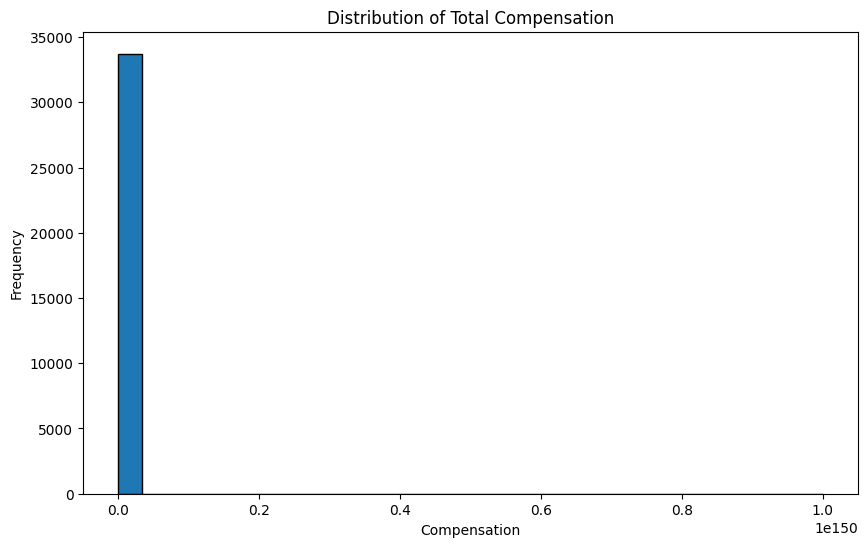

In [46]:
## Write your code here
QUERY= "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp = pd.read_sql_query(QUERY, conn)
plt.figure(figsize=(10, 6)) 
plt.hist(df_comp["CompTotal"], bins=30, edgecolor="black") 
plt.title("Distribution of Total Compensation")
plt.xlabel("Compensation")
plt.ylabel("Frequency")
plt.show()

**Box Plots**

Plot a box plot of Age.


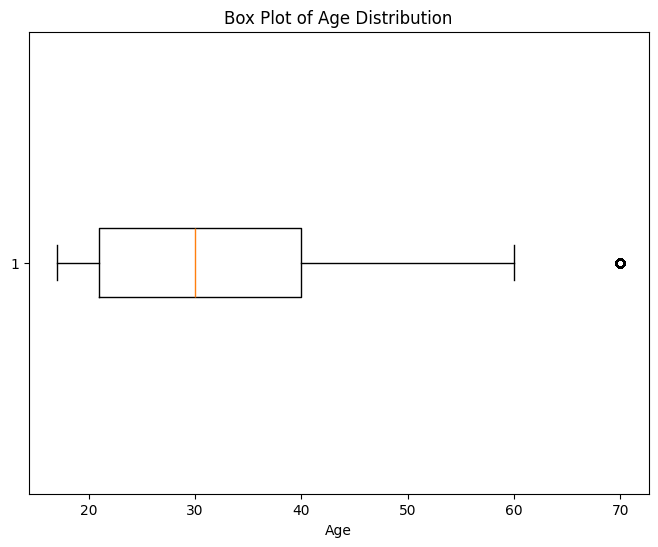

In [47]:
## Write your code here
QUERY = "SELECT Age FROM main WHERE Age IS NOT NULL" 
df_age = pd.read_sql_query(QUERY, conn)
plt.figure(figsize=(8, 6))
plt.boxplot(df_age['Age'], vert=False)
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.show()




### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


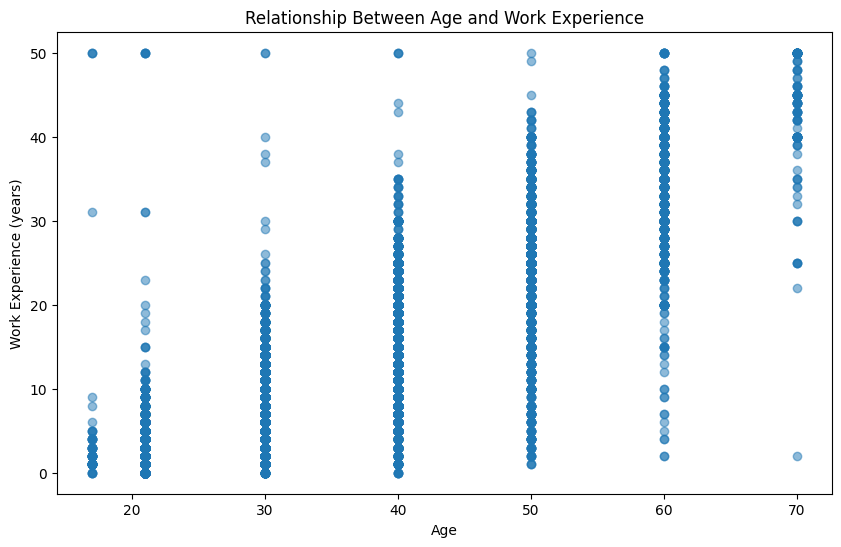

In [48]:
## Write your code here
QUERY = "SELECT Age, WorkExp FROM main WHERE Age IS NOT NULL AND WorkExp IS NOT NULL"
df_relation = pd.read_sql_query(QUERY, conn) 
plt.figure(figsize=(10, 6))
plt.scatter(df_relation["Age"], df_relation["WorkExp"], alpha=0.5)
plt.title("Relationship Between Age and Work Experience")
plt.xlabel("Age")
plt.ylabel("Work Experience (years)")
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


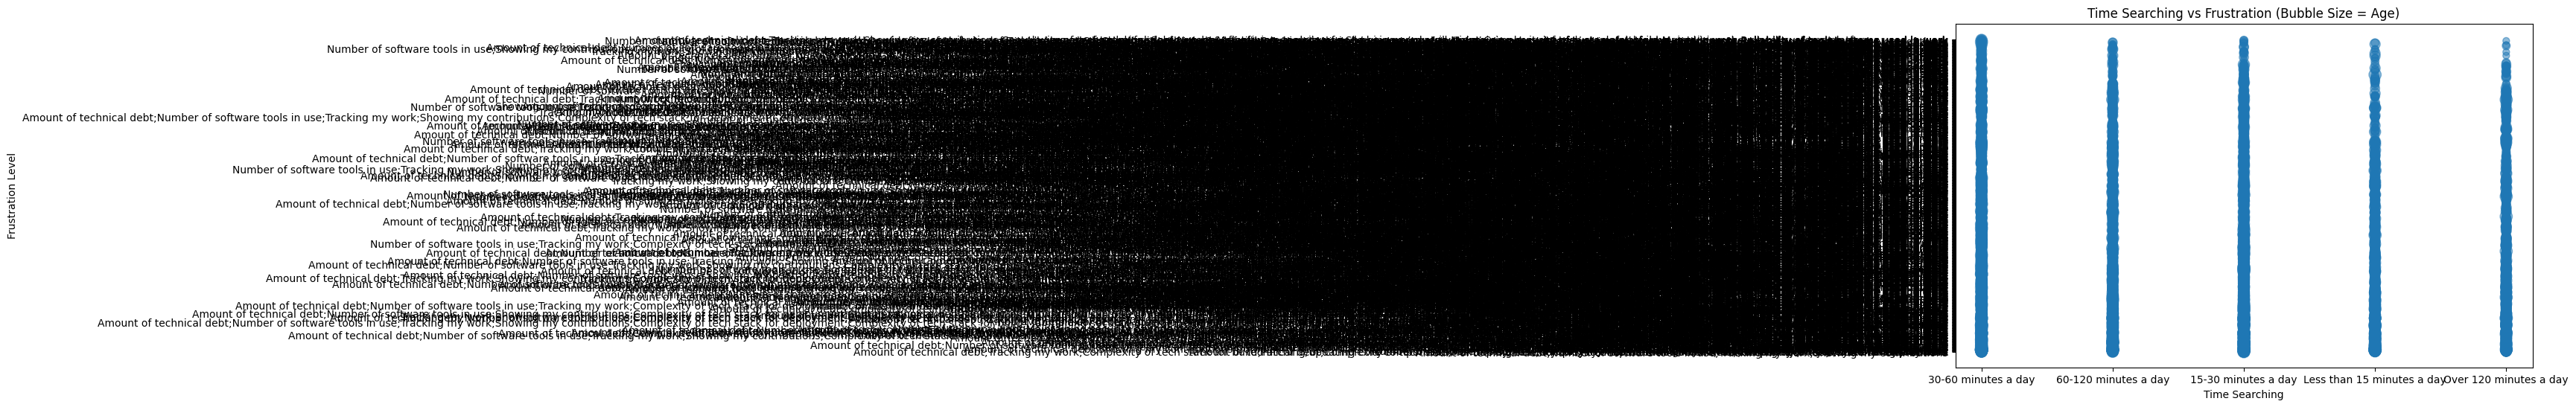

In [49]:
## Write your code here
QUERY="SELECT Age,TimeSearching, Frustration FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND Frustration IS NOT NULL"
df = pd.read_sql_query(QUERY, conn) 
plt.figure(figsize=(10, 6))
plt.scatter(df["TimeSearching"], df["Frustration"], s=df["Age"]*2, alpha=0.5)
plt.title("Time Searching vs Frustration (Bubble Size = Age)")
plt.xlabel("Time Searching")
plt.ylabel("Frustration Level")
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


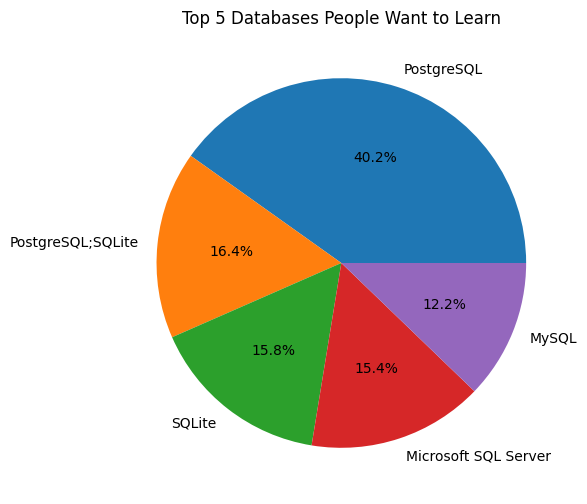

In [50]:
## Write your code here
QUERY="SELECT DatabaseWantToWorkWith, COUNT(*) AS count FROM main WHERE DatabaseWantToWorkWith IS NOT NULL GROUP BY DatabaseWantToWorkWith ORDER BY count DESC LIMIT 5"
df = pd.read_sql_query(QUERY, conn) 
plt.figure(figsize=(12, 6)) 
plt.pie(df["count"], labels=df["DatabaseWantToWorkWith"], autopct="%1.1f%%") 
plt.title('Top 5 Databases People Want to Learn')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


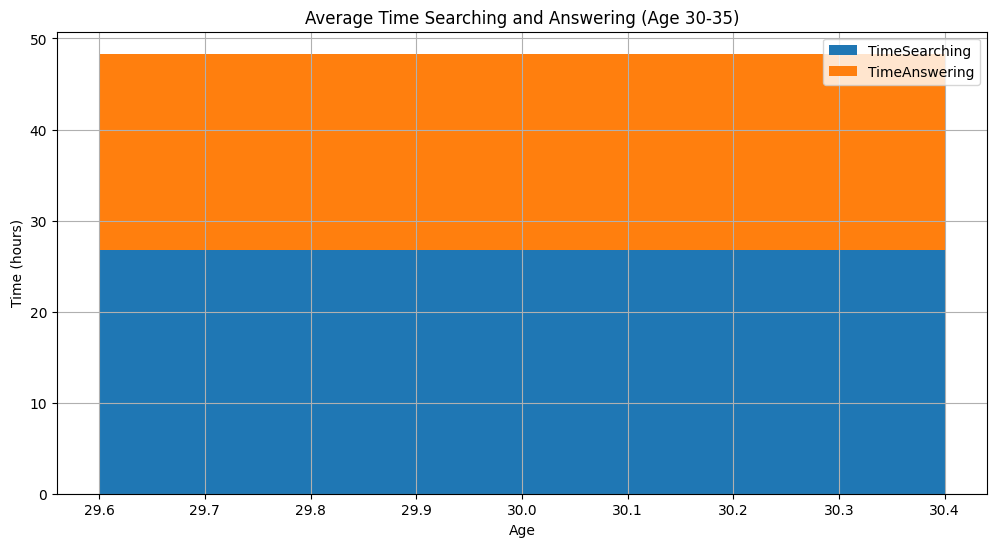

In [51]:
## Write your code here
QUERY="""SELECT Age, AVG(TimeSearching) AS avg_searching, AVG(TimeAnswering) AS avg_answering 
FROM main 
WHERE Age BETWEEN 30 AND 35 
GROUP BY Age 
ORDER BY Age"""
df = pd.read_sql_query(QUERY, conn) 

plt.figure(figsize=(12, 6)) 
plt.bar(df["Age"], df["avg_searching"], label="TimeSearching")
plt.bar(df["Age"], df["avg_answering"], bottom=df["avg_searching"], label="TimeAnswering")
plt.title("Average Time Searching and Answering (Age 30-35)")
plt.xlabel("Age")
plt.ylabel("Time (hours)")
plt.legend()
plt.grid(True)
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


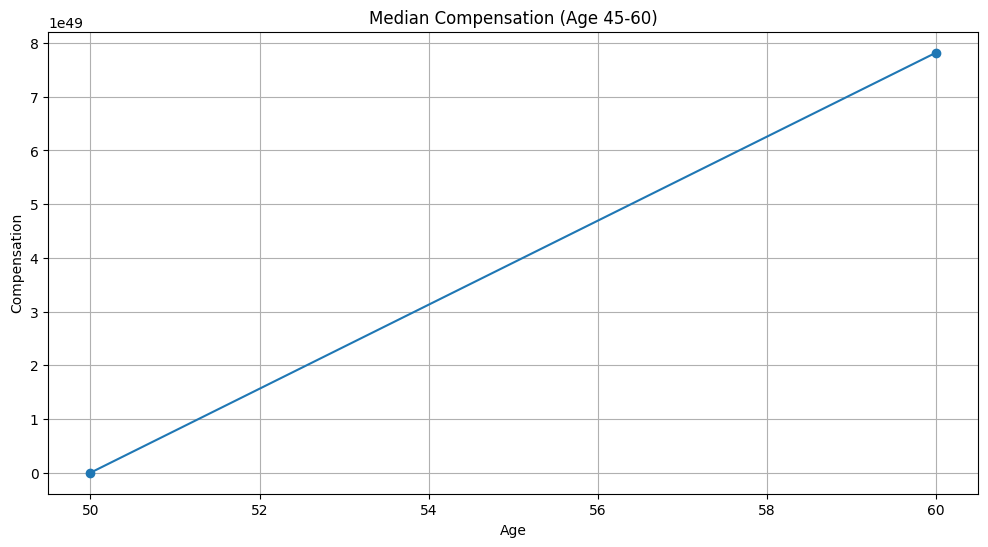

In [52]:
## Write your code here
QUERY= """SELECT Age, AVG(CompTotal) AS avg_comptotal 
FROM main
WHERE Age BETWEEN 45 AND 60 AND CompTotal IS NOT NULL
GROUP BY Age
ORDER BY Age"""
df = pd.read_sql_query(QUERY, conn) 
plt.figure(figsize=(12, 6))
plt.plot(df["Age"], df["avg_comptotal"], marker="o")
plt.title("Median Compensation (Age 45-60)")
plt.xlabel("Age")
plt.ylabel("Compensation")
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here
QUERY="""SELSCT MainBranch, COUNT(*) AS count
FROM main 
WHERE MainBranch

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
